In [83]:
%matplotlib inline
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from datetime import datetime as dt

import csv

file_19 = "Resources/divvy_2019.csv"
file_20 = "Resources/divvy_2020.csv"
file_merged = "Resources/divvy_merged.csv"

# Read in 2019 Divvy Data
#divvy19_df = pd.read_csv(file_19,low_memory=False,encoding = "ISO-8859-1")
divvy19_df = pd.read_csv(file_19)
divvy19_df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742479,2019-01-01 00:48:44,2019-01-01 00:59:39,6336,655.0,304,Broadway & Waveland Ave,332,Burling St (Halsted) & Diversey Pkwy (Temp),Subscriber,Male,1988.0
2,21742517,2019-01-01 01:37:42,2019-01-01 01:45:00,1330,438.0,128,Damen Ave & Chicago Ave,54,Ogden Ave & Chicago Ave,Subscriber,Male,1990.0
3,21742555,2019-01-01 02:27:58,2019-01-01 02:41:17,4692,799.0,482,Campbell Ave & Montrose Ave,293,Broadway & Wilson Ave,Subscriber,Male,1990.0
4,21742594,2019-01-01 03:57:29,2019-01-01 04:02:01,976,272.0,181,LaSalle St & Illinois St,140,Dearborn Pkwy & Delaware Pl,Subscriber,Male,1982.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106051,25962718,2019-12-31 19:52:14,2019-12-31 20:06:13,1817,838.0,53,Wells St & Huron St,172,Rush St & Cedar St,Subscriber,Male,1970.0
106052,25962760,2019-12-31 20:38:09,2019-12-31 20:49:23,2484,674.0,173,Mies van der Rohe Way & Chicago Ave,38,Clark St & Lake St,Subscriber,Male,1990.0
106053,25962796,2019-12-31 21:34:06,2019-12-31 21:48:56,5458,889.0,326,Clark St & Leland Ave,254,Pine Grove Ave & Irving Park Rd,Subscriber,NaN,1992.0
106054,25962837,2019-12-31 22:54:51,2019-12-31 23:12:30,646,"1,059.0",38,Clark St & Lake St,77,Clinton St & Madison St,Subscriber,Male,1985.0


In [84]:
# Lose some unused colmns
divvy19_df.drop(['end_time','bikeid','usertype','gender','birthyear'],axis=1, inplace=True)
divvy19_df

,trip_id,start_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name
0,21742443,2019-01-01 00:04:37,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave
1,21742479,2019-01-01 00:48:44,655.0,304,Broadway & Waveland Ave,332,Burling St (Halsted) & Diversey Pkwy (Temp)
2,21742517,2019-01-01 01:37:42,438.0,128,Damen Ave & Chicago Ave,54,Ogden Ave & Chicago Ave
3,21742555,2019-01-01 02:27:58,799.0,482,Campbell Ave & Montrose Ave,293,Broadway & Wilson Ave
4,21742594,2019-01-01 03:57:29,272.0,181,LaSalle St & Illinois St,140,Dearborn Pkwy & Delaware Pl
...,...,...,...,...,...,...,...
106051,25962718,2019-12-31 19:52:14,838.0,53,Wells St & Huron St,172,Rush St & Cedar St
106052,25962760,2019-12-31 20:38:09,674.0,173,Mies van der Rohe Way & Chicago Ave,38,Clark St & Lake St
106053,25962796,2019-12-31 21:34:06,889.0,326,Clark St & Leland Ave,254,Pine Grove Ave & Irving Park Rd
106054,25962837,2019-12-31 22:54:51,"1,059.0",38,Clark St & Lake St,77,Clinton St & Madison St


In [85]:
# Organize the trips by month
divvy19_df['start_time'] = pd.to_datetime(divvy19_df['start_time'],errors = 'coerce',format = '%Y-%m-%d %H:%M:%S').dt.strftime("%B")
divvy19_df #.info()

,trip_id,start_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name
0,21742443,January,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave
1,21742479,January,655.0,304,Broadway & Waveland Ave,332,Burling St (Halsted) & Diversey Pkwy (Temp)
2,21742517,January,438.0,128,Damen Ave & Chicago Ave,54,Ogden Ave & Chicago Ave
3,21742555,January,799.0,482,Campbell Ave & Montrose Ave,293,Broadway & Wilson Ave
4,21742594,January,272.0,181,LaSalle St & Illinois St,140,Dearborn Pkwy & Delaware Pl
...,...,...,...,...,...,...,...
106051,25962718,December,838.0,53,Wells St & Huron St,172,Rush St & Cedar St
106052,25962760,December,674.0,173,Mies van der Rohe Way & Chicago Ave,38,Clark St & Lake St
106053,25962796,December,889.0,326,Clark St & Leland Ave,254,Pine Grove Ave & Irving Park Rd
106054,25962837,December,"1,059.0",38,Clark St & Lake St,77,Clinton St & Madison St


In [86]:
# Sum the Monthly data, reorg base on month order and ## Find a more perfect solution to this.
div19cnt = pd.value_counts(divvy19_df['start_time'])
div19cnt = div19cnt.to_frame().reset_index()
div19cnt = pd.DataFrame(div19cnt, index=[10, 11, 8, 6, 5, 3,1,0,2,4,7,9])
div19cnt #.head()

,index,start_time
10,January,2869
11,February,2672
8,March,4600
6,April,7370
5,May,10207
3,June,13206
1,July,15482
0,August,16393
2,September,13700
4,October,10327


In [87]:
# Fix Column Names to reflect the data
div19cnt.rename(columns = {'index':'Month','start_time':'2019 Rides'},inplace=True)
div19cnt # .index

,Month,2019 Rides
10,January,2869
11,February,2672
8,March,4600
6,April,7370
5,May,10207
3,June,13206
1,July,15482
0,August,16393
2,September,13700
4,October,10327


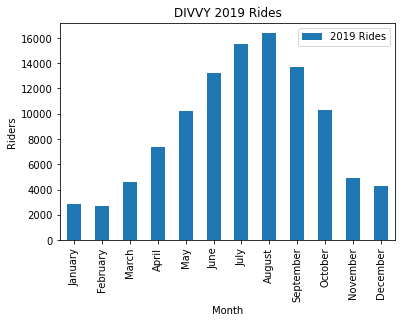

In [88]:
# Plot 2019
div19cnt.plot(x='Month',y='2019 Rides',kind='bar',title='DIVVY 2019 Rides',xlabel='Month',ylabel='Riders');

In [89]:
#Start Reading 2020
divvy20_df = pd.read_csv(file_20,low_memory=False)
divvy20_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member
1,21A882AE9EABD44E,docked_bike,2020-01-21 19:13:09,2020-01-21 19:21:11,Milwaukee Ave & Wabansia Ave,158,Damen Ave & Thomas St (Augusta Blvd),183,41.9126,-87.6814,41.9013,-87.6774,member
2,6112BC5112FF9518,docked_bike,2020-01-05 07:51:19,2020-01-05 07:55:37,Columbus Dr & Randolph St,195,Wabash Ave & Grand Ave,199,41.8847,-87.6195,41.8915,-87.6268,member
3,1E76695F1AE80B1B,docked_bike,2020-01-26 08:54:09,2020-01-26 09:01:18,Broadway & Barry Ave,300,Halsted St & Wrightwood Ave,349,41.9377,-87.6441,41.9291,-87.6491,member
4,F3418D0C3ACA50B9,docked_bike,2020-01-08 18:52:36,2020-01-08 18:55:29,Canal St & Adams St,192,Clinton St & Tilden St,68,41.8793,-87.6399,41.8759,-87.6408,member


In [90]:
#Rename 2020 Cols so they match 2019
divvy20_df = divvy20_df.rename(columns={'ride_id':'trip_id','started_at':'start_time','ended_at':'end_time','start_station_name':'from_station_name','start_station_id':'from_station_id','end_station_name':'to_station_name','end_station_id':'to_station_id'})
divvy20_df

,trip_id,rideable_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.966500,-87.688400,41.967100,-87.667400,member
1,21A882AE9EABD44E,docked_bike,2020-01-21 19:13:09,2020-01-21 19:21:11,Milwaukee Ave & Wabansia Ave,158,Damen Ave & Thomas St (Augusta Blvd),183,41.912600,-87.681400,41.901300,-87.677400,member
2,6112BC5112FF9518,docked_bike,2020-01-05 07:51:19,2020-01-05 07:55:37,Columbus Dr & Randolph St,195,Wabash Ave & Grand Ave,199,41.884700,-87.619500,41.891500,-87.626800,member
3,1E76695F1AE80B1B,docked_bike,2020-01-26 08:54:09,2020-01-26 09:01:18,Broadway & Barry Ave,300,Halsted St & Wrightwood Ave,349,41.937700,-87.644100,41.929100,-87.649100,member
4,F3418D0C3ACA50B9,docked_bike,2020-01-08 18:52:36,2020-01-08 18:55:29,Canal St & Adams St,192,Clinton St & Tilden St,68,41.879300,-87.639900,41.875900,-87.640800,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98375,48ED41248526C21B,docked_bike,2020-12-03 16:05:59,2020-12-03 16:27:12,Damen Ave & Clybourn Ave,13271,Damen Ave & Clybourn Ave,13271,41.931931,-87.677856,41.931931,-87.677856,casual
98376,64B92D133EAB5662,classic_bike,2020-12-09 14:05:22,2020-12-09 14:37:41,Shedd Aquarium,15544,Rhodes Ave & 32nd St,13215,41.867226,-87.615355,41.836208,-87.613533,member
98377,7BDA3EC496A0D15C,classic_bike,2020-12-13 08:54:12,2020-12-13 10:58:28,Bissell St & Armitage Ave,13059,Bissell St & Armitage Ave,13059,41.918440,-87.652220,41.918440,-87.652220,casual
98378,EA05A55FB3C3E921,classic_bike,2020-12-18 13:18:36,2020-12-18 13:37:59,Sheffield Ave & Webster Ave,TA1309000033,Sheffield Ave & Webster Ave,TA1309000033,41.921540,-87.653818,41.921540,-87.653818,member


In [91]:
# Drip uselesss columns
divvy20_df.drop(['rideable_type','member_casual'],axis=1, inplace=True)
divvy20_df

,trip_id,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng
0,EACB19130B0CDA4A,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.966500,-87.688400,41.967100,-87.667400
1,21A882AE9EABD44E,2020-01-21 19:13:09,2020-01-21 19:21:11,Milwaukee Ave & Wabansia Ave,158,Damen Ave & Thomas St (Augusta Blvd),183,41.912600,-87.681400,41.901300,-87.677400
2,6112BC5112FF9518,2020-01-05 07:51:19,2020-01-05 07:55:37,Columbus Dr & Randolph St,195,Wabash Ave & Grand Ave,199,41.884700,-87.619500,41.891500,-87.626800
3,1E76695F1AE80B1B,2020-01-26 08:54:09,2020-01-26 09:01:18,Broadway & Barry Ave,300,Halsted St & Wrightwood Ave,349,41.937700,-87.644100,41.929100,-87.649100
4,F3418D0C3ACA50B9,2020-01-08 18:52:36,2020-01-08 18:55:29,Canal St & Adams St,192,Clinton St & Tilden St,68,41.879300,-87.639900,41.875900,-87.640800
...,...,...,...,...,...,...,...,...,...,...,...
98375,48ED41248526C21B,2020-12-03 16:05:59,2020-12-03 16:27:12,Damen Ave & Clybourn Ave,13271,Damen Ave & Clybourn Ave,13271,41.931931,-87.677856,41.931931,-87.677856
98376,64B92D133EAB5662,2020-12-09 14:05:22,2020-12-09 14:37:41,Shedd Aquarium,15544,Rhodes Ave & 32nd St,13215,41.867226,-87.615355,41.836208,-87.613533
98377,7BDA3EC496A0D15C,2020-12-13 08:54:12,2020-12-13 10:58:28,Bissell St & Armitage Ave,13059,Bissell St & Armitage Ave,13059,41.918440,-87.652220,41.918440,-87.652220
98378,EA05A55FB3C3E921,2020-12-18 13:18:36,2020-12-18 13:37:59,Sheffield Ave & Webster Ave,TA1309000033,Sheffield Ave & Webster Ave,TA1309000033,41.921540,-87.653818,41.921540,-87.653818


In [92]:
divvy20_df['start_time'] = pd.to_datetime(divvy20_df['start_time'],errors = 'coerce',format = '%Y-%m-%d %H:%M:%S').dt.strftime("%B")
divvy20_df #.info()

,trip_id,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng
0,EACB19130B0CDA4A,January,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.966500,-87.688400,41.967100,-87.667400
1,21A882AE9EABD44E,January,2020-01-21 19:21:11,Milwaukee Ave & Wabansia Ave,158,Damen Ave & Thomas St (Augusta Blvd),183,41.912600,-87.681400,41.901300,-87.677400
2,6112BC5112FF9518,January,2020-01-05 07:55:37,Columbus Dr & Randolph St,195,Wabash Ave & Grand Ave,199,41.884700,-87.619500,41.891500,-87.626800
3,1E76695F1AE80B1B,January,2020-01-26 09:01:18,Broadway & Barry Ave,300,Halsted St & Wrightwood Ave,349,41.937700,-87.644100,41.929100,-87.649100
4,F3418D0C3ACA50B9,January,2020-01-08 18:55:29,Canal St & Adams St,192,Clinton St & Tilden St,68,41.879300,-87.639900,41.875900,-87.640800
...,...,...,...,...,...,...,...,...,...,...,...
98375,48ED41248526C21B,December,2020-12-03 16:27:12,Damen Ave & Clybourn Ave,13271,Damen Ave & Clybourn Ave,13271,41.931931,-87.677856,41.931931,-87.677856
98376,64B92D133EAB5662,December,2020-12-09 14:37:41,Shedd Aquarium,15544,Rhodes Ave & 32nd St,13215,41.867226,-87.615355,41.836208,-87.613533
98377,7BDA3EC496A0D15C,December,2020-12-13 10:58:28,Bissell St & Armitage Ave,13059,Bissell St & Armitage Ave,13059,41.918440,-87.652220,41.918440,-87.652220
98378,EA05A55FB3C3E921,December,2020-12-18 13:37:59,Sheffield Ave & Webster Ave,TA1309000033,Sheffield Ave & Webster Ave,TA1309000033,41.921540,-87.653818,41.921540,-87.653818


In [93]:
div20cnt = pd.value_counts(divvy20_df['start_time'])
div20cnt = div20cnt.to_frame().reset_index()
div20cnt = pd.DataFrame(div20cnt, index=[7, 9, 8, 11, 6, 4,1,0,2,3,5,10])
div20cnt.rename(columns = {'index':'Month','start_time':'2020 Rides'},inplace=True)
div20cnt #.head()

,Month,2020 Rides
7,January,3997
9,February,3878
8,March,3984
11,April,2354
6,May,5564
4,June,9528
1,July,15318
0,August,17287
2,September,14805
3,October,10796


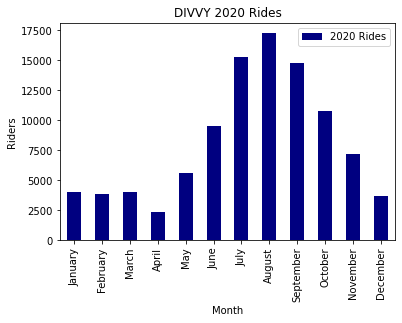

In [94]:
div20cnt.plot(x='Month',y='2020 Rides',kind='bar',title='DIVVY 2020 Rides',colormap='jet',ylabel='Riders',xlabel="Month");

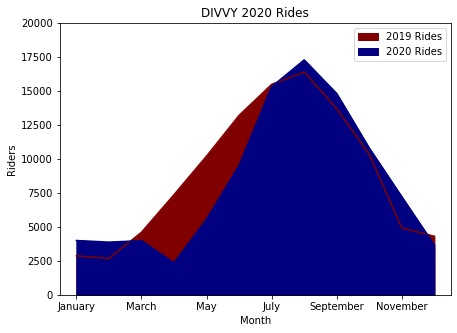

In [98]:
ax = div19cnt.plot(x='Month',y='2019 Rides',kind='area',title='DIVVY 2019 Rides',colormap='jet_r',ylabel='Riders',xlabel="Month",figsize=(7,5));
plot = div20cnt.plot(ax=ax,x='Month',y='2020 Rides',kind='area',title='DIVVY 2020 Rides',colormap='jet',ylabel='Riders',xlabel="Month",figsize=(7,5));
ax.set_xlim(-.5, 11.5);
ax.set_ylim(0,20000);
fig = plot.get_figure()
fig.savefig("ComboArea.png")